# 여섯째 마당. 그래프 그리기

**그래프(graph)**: 데이터를 보기 쉽게 그림으로 표현한 것으로 데이터의 추세나 경향성을 쉽게 파악하여 새로운 패턴의 발견이나 데이터의 특징을 설명하는데 활용.

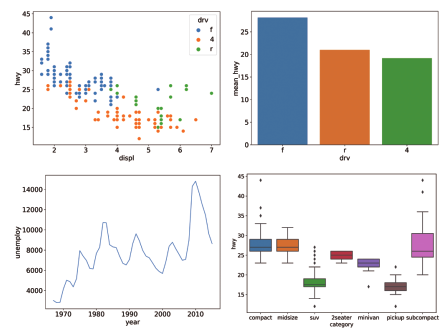

## 파이썬으로 만들 수 있는 그래프 살펴보기

* 파이썬에는 2차원 그래프뿐만 아니라 3차원 그래프, 지도 그래프, 네트워크 그래프, 모션 차트, 인터렉티브 그래프 등을 그릴 수 있는 다양한 패키지가 있음
* 특히 `seaborn` 패키지를 활용하면 쉽고 간결하게 예쁜 그래프를 그릴 수 있음

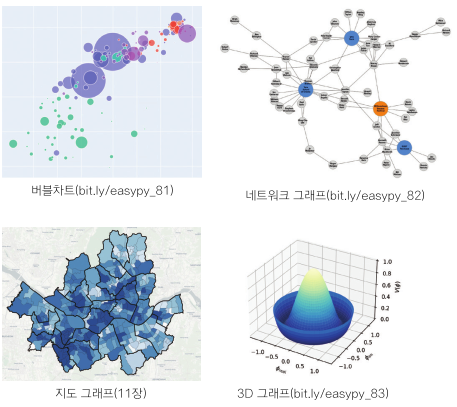

## 산점도 - 변수 간 관계 표현하기

**산점도(scatter plot):** 데이터를 x축과 y에 점으로 표현한 그래프로, 두 변수의 관계를 표현할 때 사용

### 산점도 만들기

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')
path = '/content/gdrive/MyDrive/data-analytics-101/data/'

In [ ]:
import pandas as pd

mpg = pd.read_csv(path + 'mpg.csv')
mpg.head()

In [ ]:
# x축은 displ(배기량), y축은 hwy(고속도로 연비)를 나타낸 산점도 만들기
import seaborn as sns

sns.scatterplot(data = mpg, x = 'displ', y = 'hwy')

#### 축 범위 설정하기

In [ ]:
# x축 범위 3~6으로 제한
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy').set(xlim = [3, 6])

In [ ]:
# x축 범위 3~6, y축 범위 10~30으로 제한
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy').set(xlim = [3, 6], ylim = [10, 30])

#### 종류별로 표식 색깔 바꾸기

In [ ]:
# 구동 방식(drv)별로 표식 색깔 다르게 표현하기
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'drv')

In [ ]:
# 실린더 개수(cyl)별로 표식 색깔 다르게 표현하기
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'cyl')

#### [꿀팁] 그래프 활용하기

**1) 그래프를 이미지 파일로 저장하기**

이미지를 파일로 저장하거나 복사 후에 파워포인트, 워드, 엑셀 등에 삽입

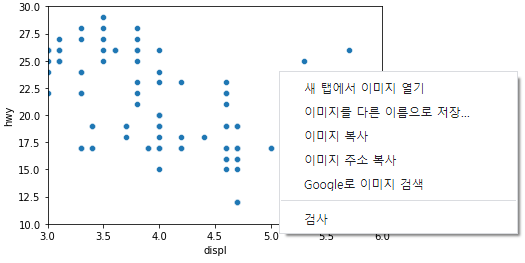

**2) 그래프 설정 바꾸기**

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.dpi' : 150})          # 해상도, 기본값 72
plt.rcParams.update({'figure.figsize' : [16, 9]})   # 그림 크기, 기본값 [6, 4]
plt.rcParams.update({'font.size' : 12})            # 글자 크기, 기본값 10
plt.rcParams.update({'font.family' : 'fantasy'})   # 폰트, 기본값 sans-serif

In [ ]:
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'cyl')

In [ ]:
# 모든 설정 되돌리기
plt.rcParams.update(plt.rcParamsDefault)

In [ ]:
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'cyl')

**3) 그래프 설명 메시지 숨기기**

그래프 출력 코드 뒤에 세미콜론(;)을 붙이면 `<matplotlib.axes._subplots.AxesSubplot...>` 메시지가 출력되지 않음.

In [ ]:
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'drv');

In [ ]:
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'drv')
plt.show()

## 막대 그래프 - 집단 간 차이 표현하기

**막대 그래프(bar chart)**: 데이터의 크기를 막대의 길이로 표현한 그래프. 연령대별 소득 등 집단 간의 차이를 표현할 때 막대 그래프를 주로 사용.

### 평균 막대 그래프 만들기

#### 1. 집단별 평균표 만들기

`mpg` 데이터를 이용해 `drv`별 `hwy` 평균을 나타낸 막대 그래프 만들기

In [ ]:
mpg.groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

In [ ]:
df_mpg = mpg.groupby('drv').agg(mean_hwy = ('hwy', 'mean'))
df_mpg

`seaborn`으로 그래프를 만들기 위해서는 값이 변수에 담겨 있어야 함.

In [ ]:
df_mpg = mpg.groupby('drv', as_index = False).agg(mean_hwy = ('hwy', 'mean'))
df_mpg

#### 2. 막대 그래프 만들기

In [ ]:
sns.barplot(data = df_mpg, x = 'drv', y = 'mean_hwy')

#### 3. 크기순으로 정렬하기

In [ ]:
# 데이터 프레임 정렬하기
df_mpg = df_mpg.sort_values('mean_hwy', ascending = False)
df_mpg

In [ ]:
# 막대 그래프 만들기
sns.barplot(data = df_mpg, x = 'drv', y = 'mean_hwy')

### 빈도 막대 그래프 만들기

#### 1. 집단별 빈도표 만들기

`mpg` 데이터를 이용해 `drv`별 빈도를 나타내는 막대 그래프 시각화.

In [ ]:
# 집단별 빈도표 만들기
df_mpg = mpg.groupby('drv', as_index = False).agg(n = ('drv', 'count')).sort_values('n', ascending=False)
df_mpg

#### 2. 막대 그래프 만들기

In [ ]:
sns.barplot(data = df_mpg, x = 'drv', y = 'n')

#### 3. `sns.countplot()`으로 빈도 막대 그래프 만들기

`df.groupby()`와 `df.agg()` 메서드를 이용하지 않아도 간단하게 빈도 막대 그래프를 그릴 수 있음.

In [ ]:
# 빈도 막대 그래프 만들기
sns.countplot(data = mpg, x = 'drv')

In [ ]:
mpg['drv'].unique() # mpg 데이터

막대 그래프의 x 축 순서는 행 인덱스 순을 따름
* `groupby()`으로 데이터 프레임을 요약하면 알파벳 순으로 바뀜

**막대 정렬하기**

In [ ]:
# 4, f, r 순으로 막대 정렬
sns.countplot(data = mpg, x = 'drv', order = ['r', '4', 'f'])

In [ ]:
# drv의 값의 빈도 계산
mpg['drv'].value_counts()

In [ ]:
# 빈도 순으로 인덱스 반환
mpg['drv'].value_counts().index

In [ ]:
# drv 빈도 높은 순으로 막대 정렬
sns.countplot(data = mpg, x = 'drv', order = mpg['drv'].value_counts().index)

## 선 그래프 - 시간에 따라 달라지는 데이터 표현하기

**선 그래프(line chart):** 데이터를 선으로 표현한 그래프로 꺾은선 그래프라고도 함. 환율, 주가지수과 시간에 따라 달라지는 경제지표와 같은 데이터가 시간에 따라 변하는 양상을 선 그래프로 표현.

* 시계열 데이터(time series data): 일정 시간 간격을 두고 나열된 데이터
* 시계열 그래프(time series chart): 시계열 데이터를 선으로 표현한 그래프

### 시계열 그래프 만들기

`economics` 데이터셋: 미국의 여러가지 경제 지표를 월별로 나타낸 데이터셋 

#### `economics` 데이터 불러오기

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')
path = '/content/gdrive/MyDrive/data-analytics-101/data/'

In [ ]:
economics = pd.read_csv(path + 'economics.csv')
economics.head()

In [ ]:
economics.info()

In [ ]:
economics.describe()

In [ ]:
# 날짜(date)에 따른 실업자 수(unemploy)를 선 그래프로 출력하기
sns.lineplot(data = economics, x = 'date', y = 'unemploy')

In [ ]:
# 날짜(date)에 따른 실업율(uempmed)를 선 그래프로 출력하기
sns.lineplot(data = economics, x = 'date', y = 'uempmed')

#### x축에 연도 표시하기

**(1) 날짜 시간 타입 변수 만들기**

In [ ]:
economics.info()

문자열(object) 객체인 date 변수를 날짜시간(datetime64) 객체로 변환하는 과정이 필요함

In [ ]:
# 날짜 시간 타입 변수 만들기
economics['date2'] = pd.to_datetime(economics['date'])
economics.info()

In [ ]:
economics[['date', 'date2']]

In [ ]:
# 연 추출
economics['date2'].dt.year

In [ ]:
# 월 추출
economics['date2'].dt.month

In [ ]:
# 일 추출
economics['date2'].dt.day

**(2) 연도 변수 만들기**

In [ ]:
# 연도 변수 추가
economics['year'] = economics['date2'].dt.year
economics.head()

**(3) x축에 연도 표시하기**

In [ ]:
# x축에 연도 표시
sns.lineplot(data = economics, x = 'year', y = 'unemploy')

In [ ]:
# 신뢰구간 제거
sns.lineplot(data = economics, x = 'year', y = 'unemploy', ci = None)

## 상자 그림 - 집단 간 분포 차이 표현하기

**상자 그림(box plot)**: 데이터의 분포 또는 퍼져 있는 형태를 직사각형 상자 모양으로 표현한 그래프.

### 상자 그림 만들기

In [ ]:
sns.boxplot(data = mpg, x = 'drv', y = 'hwy')

In [ ]:
sns.boxplot(data = mpg, x = 'drv', y = 'displ')

In [ ]:
sns.boxplot(data = mpg, x = 'category', y = 'hwy')

### 정리하기

| seaborn 함수      | 그래프                    |
|-------------------|---------------------------|
| sns.scatterplot() | 산점도                    |
| sns.barplot()     | 막대 그래프  |
| sns.countplot()   | 빈도 막대 그래프 |
| sns.lineplot()    | 선 그래프                 |
| sns.boxplot()     | 상자 그림                 |

In [ ]:
### 1. 산점도
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy')

# 축 제한
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy') \
   .set(xlim = [3, 6], ylim = [10, 30])

# 종류별로 표식 색깔 바꾸기
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'drv')


### 2. 막대 그래프

## 평균 막대 그래프

# 1단계. 평균표 만들기
df_mpg = mpg.groupby('drv', as_index = False).agg(mean_hwy = ('hwy', 'mean'))

# 2단계. 그래프 만들기
sns.barplot(data = df_mpg, x = 'drv', y = 'mean_hwy')

## 빈도 막대 그래프
sns.countplot(data = mpg, x = 'drv')


### 3. 선 그래프
sns.lineplot(data = economics, x = 'date', y = 'unemploy')


### 4. 상자 그림
sns.boxplot(data = mpg, x = 'drv', y = 'hwy')